# Pneumonia Classification in Chest X-rays "Data Exploration"
In this notebook, the initial exploration of the Chest X-Ray dataset was performed. The workflow included the definition of image transformations, the loading of the dataset, and a statistical analysis of the class distribution to identify potential imbalances.

### 1. Environment Setup and Data Configuration
The necessary libraries for image processing and data management were imported. A standard image size of 228x228 was established to maintain consistency across all experiments.

In [ ]:

# Core deep learning libraries
import torch
import torchvision

# Data handling
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Numerical and visualization
import numpy as np
import matplotlib.pyplot as plt

# System
import os

### 2. Image Transformations and Augmentation
To enhance the model's ability to generalize, a set of transformations was defined. For the training set, Data Augmentation techniques such as random rotation and horizontal flipping were implemented. Both datasets were normalized to a range of [−1,1] to stabilize the training process.

In [2]:
# Update data augmentation like dataloaders.py
IMG_SIZE = 228

train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

### 3. Dataset Loading
The images were loaded using the ImageFolder structure. The dataset was split into training and testing subsets, and the target classes were identified.

In [3]:
DATA_DIR = "../data/chest_xray"

train_dataset = datasets.ImageFolder(
    root=os.path.join(DATA_DIR, "train"),
    transform=train_transforms
)

test_dataset = datasets.ImageFolder(
    root=os.path.join(DATA_DIR, "test"),
    transform=test_transforms
)

class_names = train_dataset.classes
print("Clases:", class_names)


Clases: ['NORMAL', 'PNEUMONIA']


### 4. Visual Data Inspection
A visualization function was created to display samples from each category. This allowed for a qualitative assessment of the radiological differences between NORMAL and PNEUMONIA cases.

In [4]:
BATCH_SIZE = 32

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

### 5. Statistical Analysis of Class Distribution
The number of samples per class was calculated to detect data imbalance. Understanding this distribution was critical for selecting the appropriate loss function and evaluation metrics (such as F1-Score instead of simple Accuracy).

In [5]:
def show_images(dataset, class_names, n_per_class=5):
    plt.figure(figsize=(10, 4))
    idx = 0
    
    for class_idx, class_name in enumerate(class_names):
        count = 0
        i = 0
        while count < n_per_class:
            image, label = dataset[i]
            if label == class_idx:
                plt.subplot(len(class_names), n_per_class, idx + 1)
                
                # Desnormalizar
                img = image.permute(1, 2, 0)
                img = img * 0.5 + 0.5
                
                plt.imshow(img)
                plt.title(class_name)
                plt.axis("off")
                
                idx += 1
                count += 1
            i += 1
    
    plt.show()


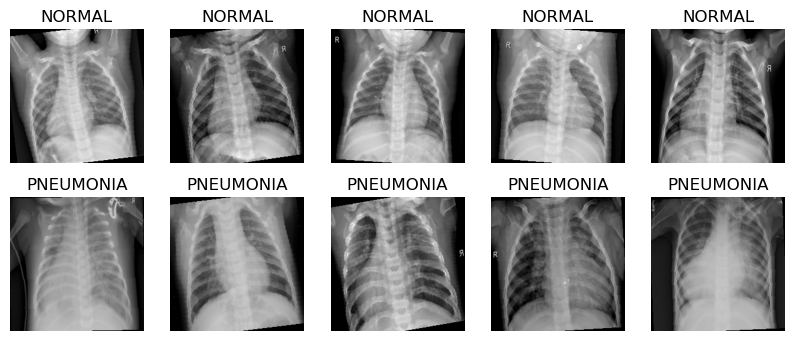

In [6]:
show_images(train_dataset, class_names, n_per_class=5)

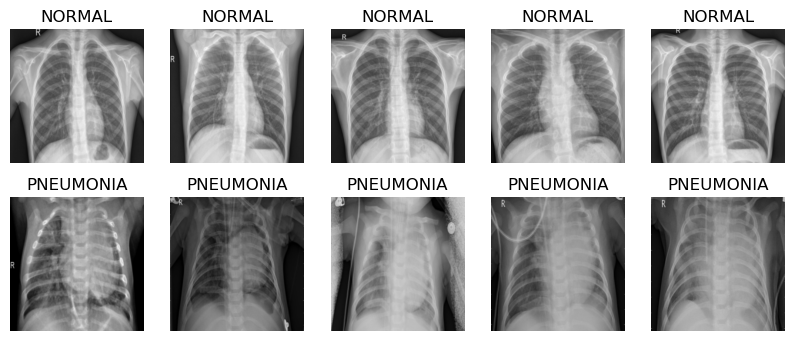

In [7]:
show_images(test_dataset, class_names, n_per_class=5)

In [8]:
print("Train samples:", len(train_dataset))
print("Test samples:", len(test_dataset))


Train samples: 5216
Test samples: 624


In [9]:
from collections import Counter

train_counts = Counter(train_dataset.targets)
test_counts = Counter(test_dataset.targets)

print("Train:", train_counts)
print("Test:", test_counts)

print("Total train:", len(train_dataset))
print("Total test:", len(test_dataset))


Train: Counter({1: 3875, 0: 1341})
Test: Counter({1: 390, 0: 234})
Total train: 5216
Total test: 624
